In [1]:
import numpy as np
import pandas as pd

In [2]:
samsung_data=pd.read_csv("D:\\Samsung_Abstract_Unique.csv")
samsung_data=samsung_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1','patent_date','patent_type',"patent_id","assignees","patent_title"])
sam=samsung_data["applications"].str.split(",",n=1,expand=True)
sam.columns=["Application_Date","Aplication_Number"]
sdata=pd.concat([samsung_data.reset_index(drop=True),sam],axis=1)
sdata=sdata.drop(columns=["applications"])

sdata.head()

C:\Users\AjayKumar\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,patent_abstract,Application_Date,Aplication_Number
0,A hermetically sealed optical component includ...,2016-05-19,15/159489
1,An optoelectronic material includes a first or...,2015-02-10,14/618597
2,An anti-EGFR/anti-HER3 antibody or antigen bin...,2015-04-22,14/692934
3,A polymer including a first structural unit re...,2016-05-06,15/148477
4,"A method of manufacturing a fluoride phosphor,...",2015-12-28,14/981887


In [3]:
sdata['Application_Date'] = pd.to_datetime(sdata['Application_Date'], format="%Y/%m/%d")
samsung_abstract = sdata.set_index(pd.DatetimeIndex(sdata["Application_Date"]))
samsung_abstract.head()

,patent_abstract,Application_Date,Aplication_Number
Application_Date,,,
2016-05-19,A hermetically sealed optical component includ...,2016-05-19,15/159489
2015-02-10,An optoelectronic material includes a first or...,2015-02-10,14/618597
2015-04-22,An anti-EGFR/anti-HER3 antibody or antigen bin...,2015-04-22,14/692934
2016-05-06,A polymer including a first structural unit re...,2016-05-06,15/148477
2015-12-28,"A method of manufacturing a fluoride phosphor,...",2015-12-28,14/981887


In [4]:
samsung_abstract=samsung_abstract.sort_index()
samsung_abstract.head()

,patent_abstract,Application_Date,Aplication_Number
Application_Date,,,
1982-01-05,A novel converter circuit converts AC input vo...,1982-01-05,06/337162
1982-08-30,NaN,1982-08-30,06/413088
1984-09-11,The present invention relates to an integrated...,1984-09-11,06/649280
1985-02-21,A motor installed on a wall of a cassette hous...,1985-02-21,06/703615
1985-06-11,NaN,1985-06-11,06/743582


In [5]:
samsung_abstract=samsung_abstract.drop(columns=["Application_Date","Aplication_Number"])
samsung_abstract.head()

,patent_abstract
Application_Date,
1982-01-05,A novel converter circuit converts AC input vo...
1982-08-30,NaN
1984-09-11,The present invention relates to an integrated...
1985-02-21,A motor installed on a wall of a cassette hous...
1985-06-11,NaN


In [6]:
samsung_abstract=samsung_abstract["2005":"2018"]
samsung_abstract.head()

,patent_abstract
Application_Date,
2005-01-03,A printing medium and a printing method thereo...
2005-01-03,In a fabrication method for forming an electri...
2005-01-03,A polynomial predistortion apparatus and metho...
2005-01-03,A recording medium storing a write protection ...
2005-01-03,Disclosed is an LCD having an adaptive luminan...


In [7]:
samsung_abstract_2005Q1=samsung_abstract["2005-01":"2005-03"]
samsung_abstract_2005Q2=samsung_abstract["2005-04":"2005-06"]
samsung_abstract_2005Q3=samsung_abstract["2005-07":"2005-09"]
samsung_abstract_2005Q4=samsung_abstract["2005-10":"2005-12"]

In [8]:
samsung_abstract_2005=samsung_abstract["2005"]
    

In [9]:
year=[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,2013, 2014, 2015, 2016, 2017, 2018]
y={}

for i in year:
    y["samsung_{0}".format(i)]=samsung_abstract[str(i)]
    
    

In [10]:
s2005=y["samsung_2005"]
s2006=y["samsung_2006"]
s2007=y["samsung_2007"]
s2008=y["samsung_2008"]
s2009=y["samsung_2009"]
s2010=y["samsung_2010"]
s2011=y["samsung_2011"]
s2012=y["samsung_2012"]
s2013=y["samsung_2013"]
s2014=y["samsung_2014"]
s2015=y["samsung_2015"]
s2016=y["samsung_2016"]
s2017=y["samsung_2017"]
s2018=y["samsung_2018"]

In [11]:
s2005.shape

(5658, 1)

In [12]:
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization 
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator # this module is for making wordcloud in python
from PIL import Image

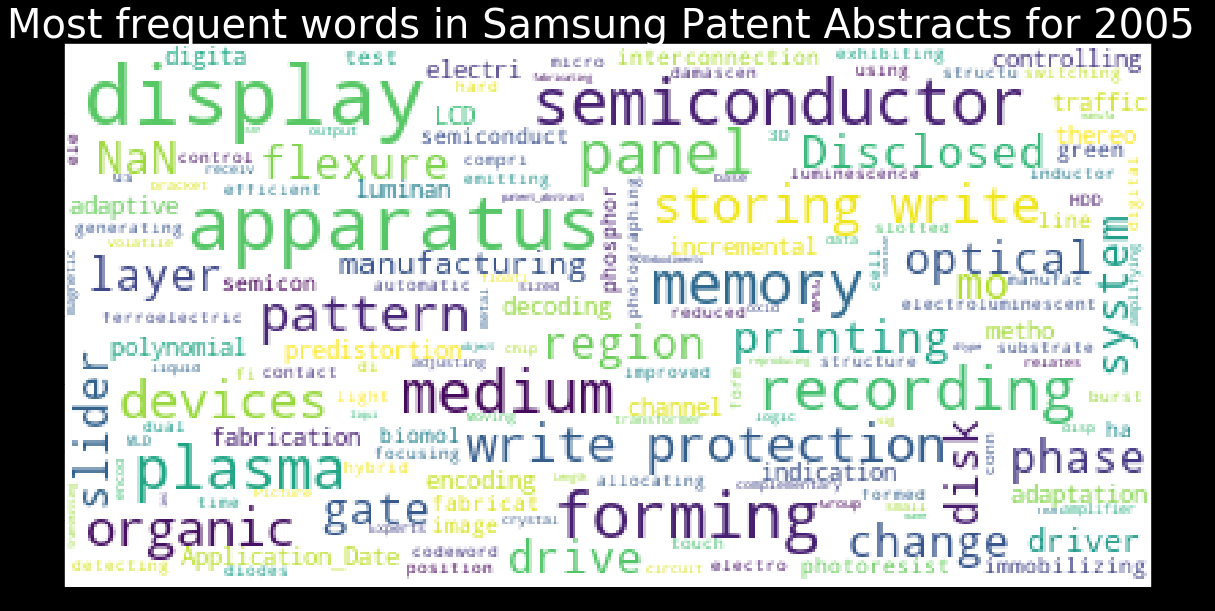

In [29]:

# generate word cloud using df_yelp_tip_top['text_clear']
stopwords = set(STOPWORDS)
stopwords.update(["a","accordance","according","all","also","an","and",
                 "another","are","as","at","be","because","been","being","by",
                 "claim","comprises","corresponding","could","described","desired",
                 "do","does","each","embodiment","fig","figs","for","from","further","generally",
                 "had","has","have","having","herein","however","if","in","into","invention","is","it",
                 "its","means","not","now","of","on","onto","or","other","particularly","preferably",
                 "preferred","present","provide","provided","provides","relatively","respectively","said",
                 "should","since","some","such","suitable","than","that","the","their","then","there","thereby",
                 "therefore","thereof","thereto","these","they","this","those","thus","to","use","various","was","includes","including",
                 "were","what","when","where","whereby","wherein","which","while","who","will","with","would","method","Methods","device"])
#wc.generate(str(s2005['patent_abstract']),stopwords=stopwords,max_words=200,)
text=s2005['patent_abstract'].astype(str)
wordcloud = WordCloud(
                          background_color='white',mode="RGBA",
                          stopwords=stopwords,
                          max_words=250,
                          max_font_size=30, 
                          random_state=42
                         ).generate(str(s2005['patent_abstract']))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Samsung Patent Abstracts for 2005 ", fontsize=40,color='white')
plt.imshow(wordcloud)
plt.show()
#plt.savefig("samsung.png", format="png")

In [15]:
def wordcloud_generate(year,imgname):
    # generate word cloud using df_yelp_tip_top['text_clear']
    stopwords = set(STOPWORDS)
    stopwords.update(["a","accordance","according","all","also","an","and",
                     "another","are","as","at","be","because","been","being","by",
                     "claim","comprises","corresponding","could","described","desired",
                     "do","does","each","embodiment","fig","figs","for","from","further","generally",
                     "had","has","have","having","herein","however","if","in","into","invention","is","it",
                     "its","means","not","now","of","on","onto","or","other","particularly","preferably",
                     "preferred","present","provide","provided","provides","relatively","respectively","said",
                     "should","since","some","such","suitable","than","that","the","their","then","there","thereby",
                     "therefore","thereof","thereto","these","they","this","those","thus","to","use","various","was","includes","including",
                     "were","what","when","where","whereby","wherein","which","while","who","will","with","would","method","Methods","device"])
    #wc.generate(str(s2005['patent_abstract']),stopwords=stopwords,max_words=200,)
    wordcloud = WordCloud(
                              background_color='white',mode="RGBA",
                              stopwords=stopwords,
                              max_words=250,
                              max_font_size=30, 
                              random_state=42
                             ).generate(str(year['patent_abstract']))
    # declare our figure 
    plt.figure(figsize=(20,10), facecolor='k')
    # add title to the graph
    plt.imshow(wordcloud)
    plt.title("Most frequent words in Patent Abstracts for %s" % imgname, fontsize=40,color='white')
    
    #plt.show()
    plt.savefig("%s.png" % imgname, format="png")
    
    wordcloud.to_file("%s.png" % imgname,)

In [16]:
syear=["s2005", "s2006", "s2007", "s2008", "s2009", "s2010", "s2011", "s2012","s2013", "s2014", "s2015", "s2016", "s2017", "s2018"]

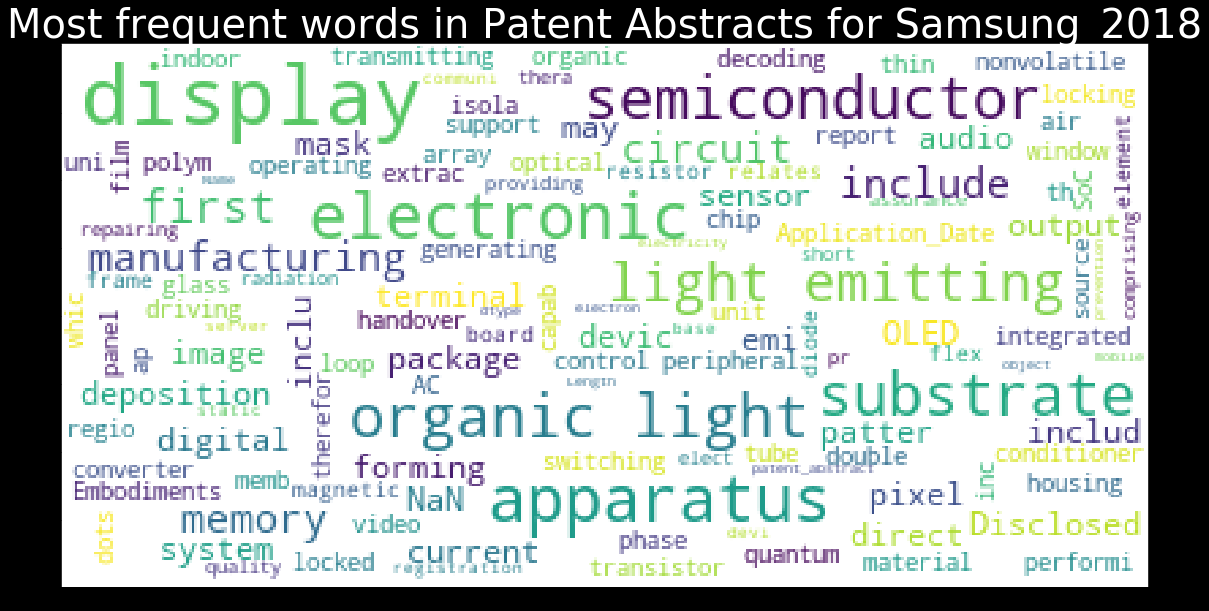

In [17]:
wordcloud_generate(s2018,"Samsung_2018")

In [19]:
# generate word cloud using df_yelp_tip_top['text_clear']
stopwords = set(STOPWORDS)
stopwords.union(["a","accordance","according","all","also","an","and",
                 "another","are","as","at","be","because","been","being","by",
                 "claim","comprises","corresponding","could","described","desired",
                 "do","does","each","embodiment","fig","figs","for","from","further","generally",
                 "had","has","have","having","herein","however","if","in","into","invention","is","it",
                 "its","means","not","now","of","on","onto","or","other","particularly","preferably",
                 "preferred","present","provide","provided","provides","relatively","respectively","said",
                 "should","since","some","such","suitable","than","that","the","their","then","there","thereby",
                 "therefore","thereof","thereto","these","they","this","those","thus","to","use","various","was","includes","including",
                 "were","what","when","where","whereby","wherein","which","while","who","will","with","would","method","Methods","device"])
#wc.generate(str(s2005['patent_abstract']),stopwords=stopwords,max_words=200,)
x=s2005["patent_abstract"].values.astype('U')
countvect=CountVectorizer(ngram_range=(1,1))
xcv=countvect.fit(x)
xcv.


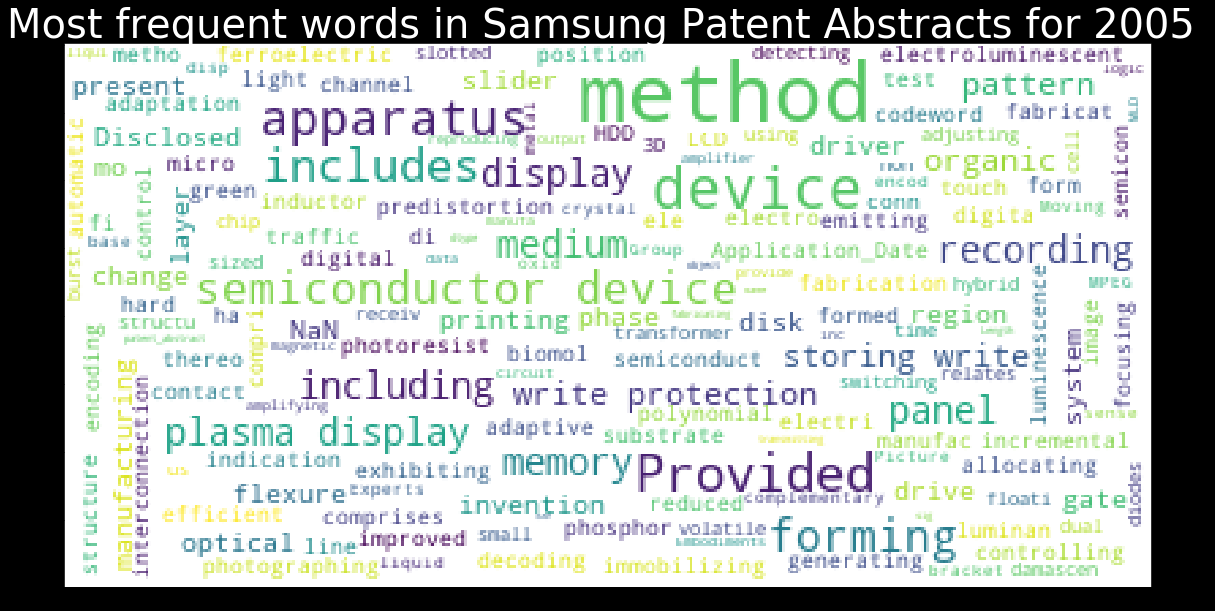

In [33]:
wordcloud = WordCloud(
                          background_color='white',mode="RGBA",
                          max_words=250,
                          max_font_size=30, 
                          random_state=42
                         ).generate(str(text))
# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')
# add title to the graph
plt.title("Most frequent words in Samsung Patent Abstracts for 2005 ", fontsize=40,color='white')
plt.imshow(wordcloud)
plt.show()
#plt.savefig("samsung.png", format="png")

In [34]:

from sklearn.feature_extraction.text import CountVectorizer

In [35]:
cv=CountVectorizer()

In [38]:
scv=cv.fit_transform(text)
scv

<5658x9874 sparse matrix of type '<class 'numpy.int64'>'
	with 253369 stored elements in Compressed Sparse Row format>

In [54]:
import nltk
from nltk.tokenize import word_tokenize
text = year['patent_abstract']
tokens = nltk.word_tokenize(text)
bigrm = nltk.bigrams(tokens)
print(*map(' '.join, bigrm), sep=', ')

TypeError: list indices must be integers or slices, not str

In [55]:
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white").\
    generate(";".join(s2005['patent_abstract']).replace(" ", "_"))
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TypeError: sequence item 20: expected str instance, float found